In [16]:
import tifffile as tiff
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [17]:
folder = Path(r'E:\temporal\volumenes\2+3+4+5\pegatinas')

filename = folder / 'frontal_90right.tif'

output_folder = folder / 'output'

output_folder.mkdir(exist_ok=True)

data = tiff.imread(filename)

print(data.shape)

(300, 1969, 1900)


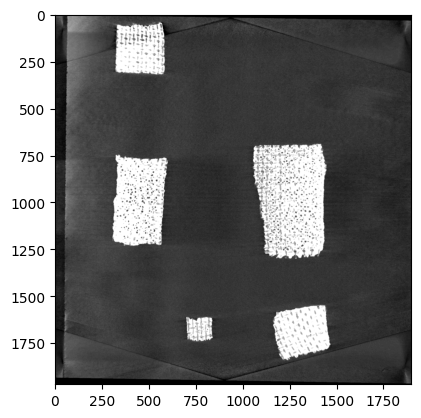

In [18]:
plt.imshow(data[27], cmap='gray')

In [26]:
from PIL import Image

def resize_image(original_image, size):
    width, height = original_image.size
    print(f"The original image size is {width} wide x {height} tall")

    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print(f"The resized image size is {width} wide x {height} tall")
    return resized_image

In [27]:
def calculate_new_dimensions(original_resolution, new_resolution, original_dimensions):
    # Calculate the original dimensions in real-world units
    original_width, original_height = original_dimensions
    real_world_width = original_width * original_resolution
    real_world_height = original_height * original_resolution

    # Calculate the new dimensions in pixels
    new_width = int(real_world_width / new_resolution)
    new_height = int(real_world_height / new_resolution)

    return new_width, new_height

In [28]:
original_resolution = 0.0218
new_resolution = 1
original_dimensions = (data.shape[2], data.shape[1])
new_dimensions = calculate_new_dimensions(original_resolution, new_resolution, original_dimensions)
print(f"The new dimensions are {new_dimensions}")
resized = resize_image(Image.fromarray(data[27]), new_dimensions)

The new dimensions are (41, 42)
The original image size is 1900 wide x 1969 tall
The resized image size is 41 wide x 42 tall


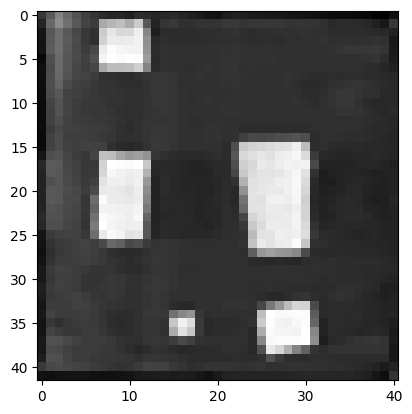

In [29]:
plt.imshow(resized, cmap='gray')